# Cleaning and normalizing data

##Import packages

In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import pandas as pd
import pickle
import matplotlib.pyplot as plt

##Import document as data frame

In [2]:
df_cleaned = pd.read_excel('./output/fluxo_escolar_2021_cleaned.xlsx',engine='openpyxl')
print(df_cleaned.shape)
df_cleaned.head()

(3745, 17)


,Unnamed: 0,ano,NM_DIRETORIA,municipio,CD_REDE_ENSINO,CD_ESCOLA,escola,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono
0,0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
1,1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.00,0.00,0.0,99.56,0.44,0.0,94.00,2.00,4.00
2,2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
3,3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
4,6,2021,AMERICANA,AMERICANA,1,17176,MAGI MONSENHOR,8,94.74,5.26,0.0,93.35,6.65,0.0,79.82,19.29,0.89


In [3]:
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0', 'NM_DIRETORIA', 'CD_REDE_ENSINO', 'CD_ESCOLA', 'CD_TP_IDENTIFICADOR', 'APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2'])
df_cleaned

,ano,municipio,escola,aprovado,reprovado,abandono
0,2021,PIRAJU,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,100.00,0.00,0.00
1,2021,PIRAJU,QUINZINHO CAMARGO PREFEITO,94.00,2.00,4.00
2,2021,PIRAJU,NHONHO BRAGA CORONEL,100.00,0.00,0.00
3,2021,PIRAJU,ATALIBA LEONEL,100.00,0.00,0.00
4,2021,AMERICANA,MAGI MONSENHOR,79.82,19.29,0.89
...,...,...,...,...,...,...
3740,2021,BAURU,JOAQUIM RODRIGUES MADUREIRA,99.71,0.29,0.00
3741,2021,BAURU,CHRISTINO CABRAL PROF,99.73,0.27,0.00
3742,2021,BAURU,CARLOS CHAGAS DR,99.77,0.00,0.23
3743,2021,BAURU,ARMINDA SBRISSIA IRMA,98.58,0.00,1.42


##Removing lines with negative number

In [4]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(str)
df_cleaned = df_cleaned[df_cleaned["aprovado"].str.contains("-") == False]

df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(str)
df_cleaned = df_cleaned[df_cleaned["reprovado"].str.contains("-") == False]

df_cleaned['abandono'] = df_cleaned['abandono'].astype(str)
df_cleaned = df_cleaned[df_cleaned["abandono"].str.contains("-") == False]

print(df_cleaned.shape)
df_cleaned.head()

(3739, 6)


,ano,municipio,escola,aprovado,reprovado,abandono
0,2021,PIRAJU,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,100.0,0.0,0.0
1,2021,PIRAJU,QUINZINHO CAMARGO PREFEITO,94.0,2.0,4.0
2,2021,PIRAJU,NHONHO BRAGA CORONEL,100.0,0.0,0.0
3,2021,PIRAJU,ATALIBA LEONEL,100.0,0.0,0.0
4,2021,AMERICANA,MAGI MONSENHOR,79.82,19.29,0.89


##Convert columns to float

In [5]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(float)
df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(float)
df_cleaned['abandono'] = df_cleaned['abandono'].astype(float)

##Remove rows that have just 0 values and reset index

In [6]:
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(columns=['index'])

print(df_cleaned.shape)
df_cleaned.head()

(3739, 6)


,ano,municipio,escola,aprovado,reprovado,abandono
0,2021,PIRAJU,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,100.00,0.00,0.00
1,2021,PIRAJU,QUINZINHO CAMARGO PREFEITO,94.00,2.00,4.00
2,2021,PIRAJU,NHONHO BRAGA CORONEL,100.00,0.00,0.00
3,2021,PIRAJU,ATALIBA LEONEL,100.00,0.00,0.00
4,2021,AMERICANA,MAGI MONSENHOR,79.82,19.29,0.89


##Normalizing data

In [14]:
normalized_list = preprocessing.normalize([df_cleaned['ano'],df_cleaned['aprovado'],df_cleaned['reprovado'],df_cleaned['abandono']])

df_cleaned['ano_normalized'] = normalized_list[0]
df_cleaned['aprovado_normalized'] = normalized_list[1]
df_cleaned['reprovado_normalized'] = normalized_list[2]
df_cleaned['abandono_normalized'] = normalized_list[3]

print(df_cleaned.shape)
df_cleaned.head()

(3739, 10)


,ano,municipio,escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
0,2021,PIRAJU,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,100.00,0.00,0.00,0.016354,0.016734,0.000000,0.000000
1,2021,PIRAJU,QUINZINHO CAMARGO PREFEITO,94.00,2.00,4.00,0.016354,0.015730,0.007529,0.031967
2,2021,PIRAJU,NHONHO BRAGA CORONEL,100.00,0.00,0.00,0.016354,0.016734,0.000000,0.000000
3,2021,PIRAJU,ATALIBA LEONEL,100.00,0.00,0.00,0.016354,0.016734,0.000000,0.000000
4,2021,AMERICANA,MAGI MONSENHOR,79.82,19.29,0.89,0.016354,0.013357,0.072618,0.007113


##Creating normalized file

In [8]:
df_cleaned.to_excel('./output/FluxoEscolarNormalizado.xlsx', encoding="utf-8")

# Start of creating the predictive model

##Import libs

In [ ]:
# import numpy as np



# from sklearn.svm import SVR
# from sklearn import svm
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler

#Check point: Open the file created from the normalization above


##Choosing which municipality we want to analyze

In [12]:
df = pd.read_excel('./output/FluxoEscolarNormalizado.xlsx', engine='openpyxl')
df = df[df["municipio"] == "SAO PAULO"]
df.head()

,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
364,364,2021,SAO PAULO,GAVIAO PEIXOTO BRIGADEIRO,99.80,0.00,0.2,0.016354,0.016700,0.000000,0.001598
365,365,2021,SAO PAULO,JOAO SOLIMEO,100.00,0.00,0.0,0.016354,0.016734,0.000000,0.000000
366,366,2021,SAO PAULO,WALFREDO ARANTES CALDAS PROFESSOR,99.91,0.09,0.0,0.016354,0.016719,0.000339,0.000000
367,367,2021,SAO PAULO,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,99.07,0.93,0.0,0.016354,0.016578,0.003501,0.000000
368,368,2021,SAO PAULO,RENATO DE ARRUDA PENTEADO PROFESSOR,100.00,0.00,0.0,0.016354,0.016734,0.000000,0.000000


##Removing unnecessary columns

In [13]:
df = df.drop(['Unnamed: 0', 'ano', 'municipio', 'escola', 'aprovado', 'reprovado', 'abandono', 'reprovado_normalized', 'abandono_normalized'], axis='columns')
print(df.shape)
df.head()

(612, 2)


,ano_normalized,aprovado_normalized
364,0.016354,0.016700
365,0.016354,0.016734
366,0.016354,0.016719
367,0.016354,0.016578
368,0.016354,0.016734


#Scraping the data to decrease bias

In [15]:
random_df = df.sample(frac=1).reset_index(drop=True)
random_df.head()

,ano_normalized,aprovado_normalized
0,0.016354,0.014224
1,0.016354,0.015750
2,0.016354,0.016734
3,0.016354,0.015385
4,0.016354,0.016426


#Split the data frame between training and testing

In [17]:
train, test = train_test_split(random_df, test_size=0.2)

## Handling training data

#Split between predictors and classes

In [19]:
train.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples | #Get all labels from the target

In [22]:
x_df_train = train.iloc[:, :-1].values
y_df_train = train.iloc[:, -1].values

## Handling test data

#Split between predictors and classes

In [23]:
test.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples | #Get all labels from the target

In [24]:
x_df_test = test.iloc[:, :-1].values
y_df_test = test.iloc[:, -1].values

##Save variables

In [26]:
with open('students.pickle', mode='wb') as f:
    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

#Variable to compile percent error

In [27]:
height = []

# Test using Linear Regression Model

##Creating a linear regression object. Conducting training. Performing tests

In [29]:
regr = linear_model.LinearRegression()
regr.fit(x_df_train, y_df_train)
aprovados_y_pred = regr.predict(x_df_test)


##Coefficients. Mean absolute percentage error. Coefficient of determination: "1" is a perfect prediction.

In [31]:
print("Coefficients:", regr.coef_)
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_df_test, aprovados_y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_df_test, aprovados_y_pred))

Coefficients: [0.22540123]
Mean absolute percentage error: 0.05
Coefficient of determination: -0.02


##Plots

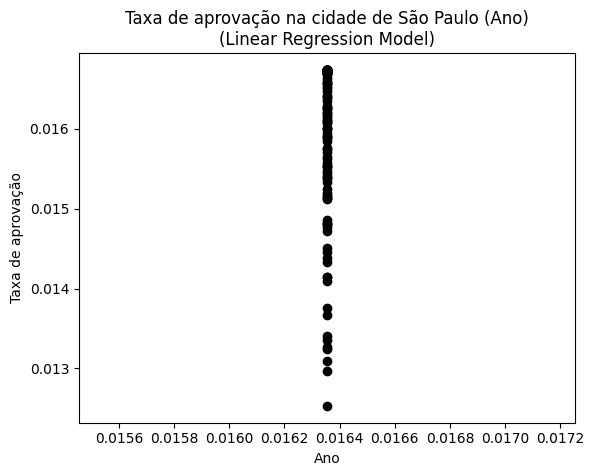

In [33]:
plt.scatter(x_df_test, y_df_test, color="black")
plt.plot(x_df_test, aprovados_y_pred, color="blue", linewidth=3)

plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Linear Regression Model)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

In [ ]:
lw = 2

lr_fit_intercept_false = linear_model.LinearRegression(fit_intercept=False)
lr_fit_one_job = linear_model.LinearRegression(fit_intercept=False, n_jobs=1)
lr_fit_two_jobs = linear_model.LinearRegression(fit_intercept=False, n_jobs=2)

lrs = [lr_fit_intercept_false, lr_fit_one_job, lr_fit_two_jobs]
lrs_label = ["Fit Intercept False", "One Job", "Two jobs"]
model_color = ["c", "g", "r"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, lr in enumerate(lrs):
    prediction = regr.fit(x_df_train, y_df_train).predict(x_df_test)
    axes[ix].plot(
        x_df_test,
        prediction,
        color="k",
        lw=lw,
        label="{} model".format(lrs_label[ix]),
    )
    axes[ix].scatter(
        x_df_test,
        y_df_test,
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(lrs_label[ix]),
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_df_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Linear Regression", fontsize=14)
plt.show()

# Test using SVM
##Creating a SVR model

In [ ]:
model_SVR = svm.SVR(kernel="linear")
sc_X = StandardScaler() 
sc_y = StandardScaler() 

# Dimensionando dados de treino
X = sc_X.fit_transform(x_df_train) 
y = sc_y.fit_transform(y_df_train.reshape(-1, 1))
model_SVR.fit(X, y)

## Modelo de predição com dados de teste dimensionados
X_test = sc_X.fit_transform(x_df_test) 
y_test = sc_y.fit_transform(y_df_test.reshape(-1, 1))
Y_pred = model_SVR.predict(X_test)
print(mean_absolute_percentage_error(y_test, Y_pred))

## Modelo de predição com dados de teste NÃO dimensionados
# Y_pred = model_SVR.predict(x_df_test)
# print(mean_absolute_percentage_error(y_df_test, Y_pred))

##Calculating model score

In [ ]:
## Score com dados de teste dimensionados
model_SVR.score(X_test, y_test)

## Score com dados de teste NÃO dimensionados
# model_SVR.score(x_df_test, y_df_test)

##plots

In [ ]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X_test, model_SVR.predict(X_test), color = 'green')
plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Support Vector Regression ModelModel)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

##Analyze SVR model to diferents Kernel

In [ ]:
lw = 2

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    prediction = svr.fit(X, y).predict(X_test)
    axes[ix].plot(
        X_test,
        prediction,
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Random Forest

In [ ]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_df_train, y_df_train)
Y_pred = model_RFR.predict(x_df_test)

mean_absolute_percentage_error(y_df_test, Y_pred)


In [ ]:
plt.scatter(x_df_test, y_df_test, color = 'magenta')
plt.plot(x_df_test, model_RFR.predict(x_df_test), color = 'green')
plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Random Forest)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

In [ ]:
lw = 2

rfr_squared = RandomForestRegressor(n_estimators=10, criterion="squared_error")
rfr_absolute = RandomForestRegressor(n_estimators=10, criterion="absolute_error")
rfr_poisson = RandomForestRegressor(n_estimators=10, criterion="poisson")

rfrs = [rfr_squared, rfr_absolute, rfr_poisson]
rfrs_label = ["Squared error", "Absolute error", "Poisson"]
model_color = ["c", "g", "r"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, rfr in enumerate(rfrs):
    prediction = model_RFR.fit(x_df_train, y_df_train).predict(x_df_test)
    axes[ix].plot(
        x_df_test,
        prediction,
        color="k",
        lw=lw,
        label="{} model".format(rfrs_label[ix]),
    )
    axes[ix].scatter(
        x_df_test,
        y_df_test,
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(rfrs_label[ix]),
    )
    # axes[ix].scatter(
    #     x_df_test,
    #     y_df_test,
    #     facecolor="none",
    #     edgecolor="k",
    #     s=20,
    #     label="other training data",
    # )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_df_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Random Forest Regressor", fontsize=14)
plt.show()

# Comparating models

In [ ]:

left = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]

tick_label = ['LR Fit\nIntercept\nFalse', 'LR\nOne\nJob', 'LR\nTwo\nJobs', 'SVR\nRBF', 'SVR\nLinear', 'SVR\nPoly', 'RF\nSquared\nError', 'RF\nAbsolute\nError', 'RF\nPoisson']
plt.bar(left, height, tick_label = tick_label, width = 1.8, color = ['magenta', 'magenta', 'magenta', 'blue', 'blue', 'blue', 'green', 'green', 'green'])
  
plt.xlabel('Models')
plt.ylabel('Mean absolute percentage error')
plt.title('Comparating models')
  
plt.show()